In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import numpy as np
import seaborn as sns

import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("../../2018.csv")
application_df.tail()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
7213441,2018-12-31,AA,1815,DCA,CLT,1534,1530.0,-4.0,20.0,1550.0,...,100.0,99.0,72.0,331.0,NaN,NaN,NaN,NaN,NaN,NaN
7213442,2018-12-31,AA,1816,CLT,DFW,1751,1757.0,6.0,18.0,1815.0,...,181.0,176.0,148.0,936.0,NaN,NaN,NaN,NaN,NaN,NaN
7213443,2018-12-31,AA,1817,CLT,MEM,2015,2010.0,-5.0,36.0,2046.0,...,112.0,128.0,88.0,511.0,NaN,NaN,NaN,NaN,NaN,NaN
7213444,2018-12-31,AA,1818,CLT,RDU,1300,1323.0,23.0,11.0,1334.0,...,50.0,41.0,26.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN
7213445,2018-12-31,AA,1818,RDU,CLT,1435,1443.0,8.0,8.0,1451.0,...,71.0,59.0,44.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [3]:
application_df.shape

(7213446, 28)

In [4]:
top_airports= ["ATL","ORD","DFW","CLT","DEN"]
##"LAX","PHX","IAH","SFO","LAS"]
top_airlines=["WN", "AA", "DL", "OO", "UA"]
application_df_top10 = application_df.loc[(application_df['ORIGIN'].isin(top_airports) & application_df['DEST'].isin(top_airports) & application_df['OP_CARRIER'].isin(top_airlines))]


In [5]:
application_df_top10.shape

(100170, 28)

In [6]:
application_df_top10['DIVERTED'].unique()

array([0., 1.])

In [7]:
application_df_top10["FL_DATE"] = pd.to_datetime(application_df_top10["FL_DATE"])

c:\Users\ajayg\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
#application_df_top10["YEAR"]=application_df_top10["FL_DATE"].dt.year
application_df_top10["MONTH"]=application_df_top10["FL_DATE"].dt.month
application_df_top10["DAY"]=application_df_top10["FL_DATE"].dt.day
application_df_top10["WEEKDAY"]=application_df_top10["FL_DATE"].dt.dayofweek


c:\Users\ajayg\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\ajayg\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\ajayg\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [9]:
#application_df_top10["TIME_CATEGORY"] = 0
#application_df_top10.loc[(application_df_top10["CRS_DEP_TIME"] >= 0) & (application_df_top10["CRS_DEP_TIME"] < 600), "TIME_CATEGORY"] = 1
#application_df_top10.loc[(application_df_top10["CRS_DEP_TIME"] >= 600) & (application_df_top10["CRS_DEP_TIME"] < 1200), "TIME_CATEGORY"] = 2
#application_df_top10.loc[(application_df_top10["CRS_DEP_TIME"] >= 1200) & (application_df_top10["CRS_DEP_TIME"] < 1800), "TIME_CATEGORY"] = 3
#application_df_top10.loc[(application_df_top10["CRS_DEP_TIME"] >= 1800) & (application_df_top10["CRS_DEP_TIME"] < 2400), "TIME_CATEGORY"] = 4


In [10]:
application_df_top10.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,MONTH,DAY,WEEKDAY
38,2018-01-01,UA,2385,DEN,ORD,915,909.0,-6.0,12.0,921.0,...,888.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0
58,2018-01-01,UA,2158,ORD,CLT,2101,2127.0,26.0,16.0,2143.0,...,599.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0
143,2018-01-01,UA,2071,ORD,DEN,1345,1342.0,-3.0,18.0,1400.0,...,888.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0
194,2018-01-01,UA,2015,ORD,DEN,2245,2246.0,1.0,18.0,2304.0,...,888.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0
369,2018-01-01,UA,1822,DFW,DEN,915,907.0,-8.0,13.0,920.0,...,641.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0


In [11]:
flight_data_df = application_df_top10.drop(["FL_DATE","OP_CARRIER_FL_NUM","CANCELLATION_CODE", "DEP_DELAY", "ARR_DELAY", "LATE_AIRCRAFT_DELAY","NAS_DELAY","Unnamed: 27"],axis=1)
flight_data_df.head()

,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,SECURITY_DELAY,MONTH,DAY,WEEKDAY
38,UA,DEN,ORD,915,909.0,12.0,921.0,1216.0,19.0,1242,...,147.0,146.0,115.0,888.0,NaN,NaN,NaN,1,1,0
58,UA,ORD,CLT,2101,2127.0,16.0,2143.0,2359.0,4.0,3,...,122.0,96.0,76.0,599.0,NaN,NaN,NaN,1,1,0
143,UA,ORD,DEN,1345,1342.0,18.0,1400.0,1511.0,8.0,1527,...,162.0,157.0,131.0,888.0,NaN,NaN,NaN,1,1,0
194,UA,ORD,DEN,2245,2246.0,18.0,2304.0,6.0,6.0,30,...,165.0,146.0,122.0,888.0,NaN,NaN,NaN,1,1,0
369,UA,DFW,DEN,915,907.0,13.0,920.0,955.0,16.0,1025,...,130.0,124.0,95.0,641.0,NaN,NaN,NaN,1,1,0


In [12]:
flight_data_df = flight_data_df.fillna(0)

In [13]:
flight_data_df.shape

(100170, 23)

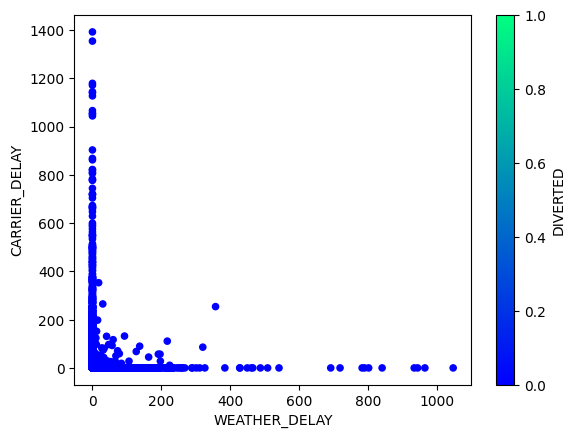

In [14]:
flight_data_df.plot.scatter(x="WEATHER_DELAY", y="CARRIER_DELAY", c="DIVERTED", colormap="winter")
plt.show()

In [27]:
flight_data_df.corr()

,CRS_DEP_TIME,DEP_TIME,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,SECURITY_DELAY,MONTH,DAY,WEEKDAY
CRS_DEP_TIME,1.000000,0.924757,0.026803,0.908068,0.678347,-0.015532,0.759143,0.631291,0.018411,0.011441,0.003356,-0.015405,-0.020391,-0.039320,0.028721,0.028496,0.002495,-0.001976,0.000675,0.011874
DEP_TIME,0.924757,1.000000,0.085943,0.982278,0.750778,0.031235,0.722565,0.703461,-0.236365,0.013373,0.006216,0.079551,0.056393,-0.035234,0.041352,0.024461,0.005375,-0.004951,-0.002646,0.012107
TAXI_OUT,0.026803,0.085943,1.000000,0.119283,0.092459,0.039051,0.030534,0.091351,-0.182842,0.020529,-0.059240,0.254014,-0.008260,-0.097808,0.034287,0.070665,0.004836,0.009619,0.002359,-0.022214
WHEELS_OFF,0.908068,0.982278,0.119283,1.000000,0.768175,0.037163,0.716660,0.720723,-0.256677,0.014320,0.002791,0.091831,0.059353,-0.039575,0.035927,0.014968,0.005421,-0.004075,-0.002168,0.013485
WHEELS_ON,0.678347,0.750778,0.092459,0.768175,1.000000,0.078361,0.787260,0.950781,-0.270203,0.001691,0.048292,0.140061,0.110016,0.038136,-0.007569,-0.005470,0.003708,-0.009808,-0.002024,0.017716
TAXI_IN,-0.015532,0.031235,0.039051,0.037163,0.078361,1.000000,0.035978,0.087611,-0.152354,0.019478,0.024102,0.223795,0.046501,-0.008023,0.003579,0.015088,-0.001001,0.060673,0.004498,-0.003925
CRS_ARR_TIME,0.759143,0.722565,0.030534,0.716660,0.787260,0.035978,1.000000,0.784277,0.002254,0.014044,0.034941,0.023313,0.010599,0.023870,0.015453,0.023856,0.000677,-0.005754,0.001936,0.011802
ARR_TIME,0.631291,0.703461,0.091351,0.720723,0.950781,0.087611,0.784277,1.000000,-0.267613,-0.001017,0.044416,0.136194,0.104277,0.032229,-0.009857,-0.006322,0.001949,-0.007879,-0.001193,0.015874
CANCELLED,0.018411,-0.236365,-0.182842,-0.256677,-0.270203,-0.152354,0.002254,-0.267613,1.000000,-0.005102,0.000784,-0.344040,-0.289392,-0.002054,-0.014147,-0.006634,-0.001709,0.010728,0.002923,-0.007267
DIVERTED,0.011441,0.013373,0.020529,0.014320,0.001691,0.019478,0.014044,-0.001017,-0.005102,1.000000,0.015471,-0.182932,-0.153875,0.011658,-0.007522,-0.003528,-0.000909,0.003641,0.004317,-0.013215


<AxesSubplot:>

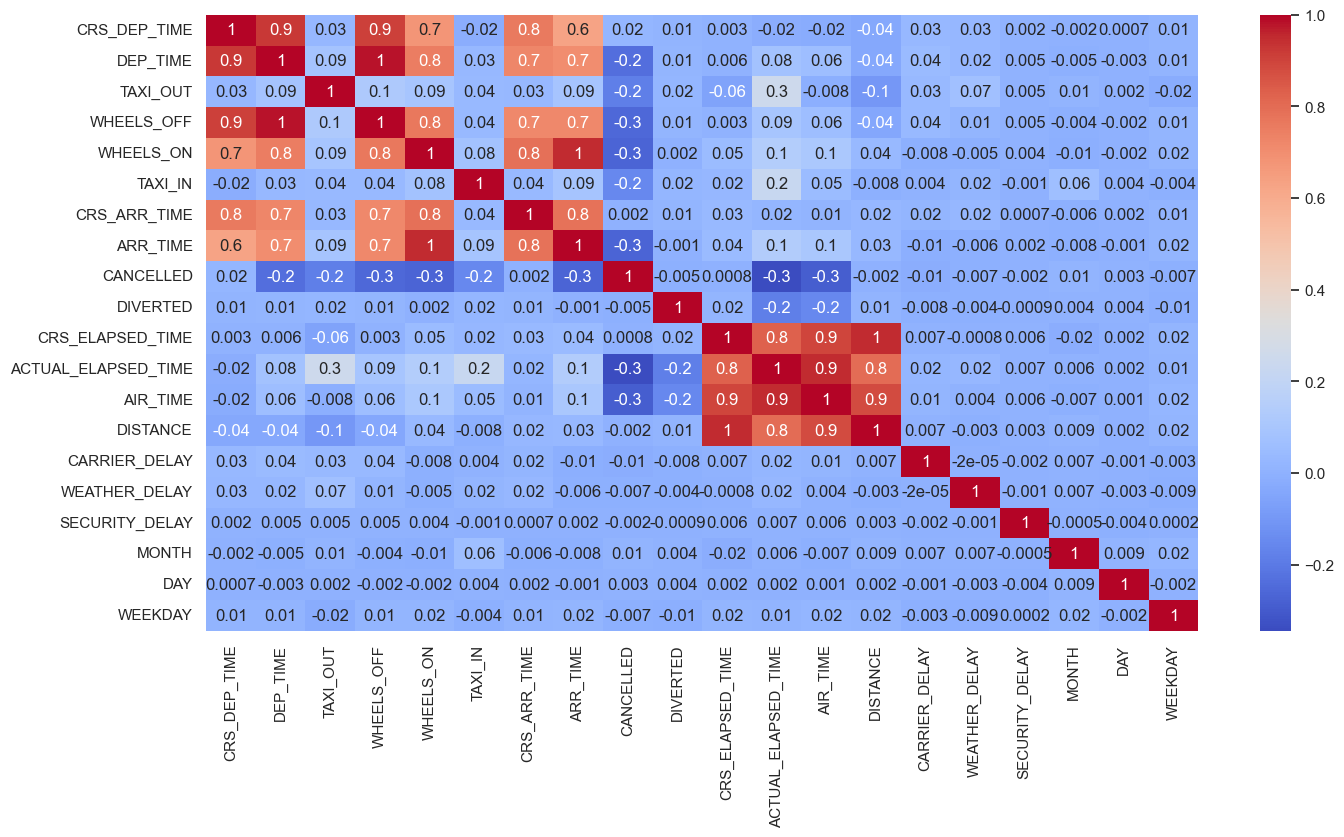

In [30]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(flight_data_df.corr(), annot = True, fmt='.1g',cmap= 'coolwarm')


In [15]:
#flight_data_df.loc[flight_data_df["WEATHER_DELAY"] > 0, "WEATHER_DELAY_1"]=1
#flight_data_df.loc[flight_data_df["LATE_AIRCRAFT_DELAY"] > 0, "LATE_AIRCRAFT_DELAY_1"]=1

In [16]:
#flight_data_df['DELAY'] = np.where((flight_data_df.ARR_DELAY > 0), 1, 0)
#
flight_data_df.head()

,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,SECURITY_DELAY,MONTH,DAY,WEEKDAY
38,UA,DEN,ORD,915,909.0,12.0,921.0,1216.0,19.0,1242,...,147.0,146.0,115.0,888.0,0.0,0.0,0.0,1,1,0
58,UA,ORD,CLT,2101,2127.0,16.0,2143.0,2359.0,4.0,3,...,122.0,96.0,76.0,599.0,0.0,0.0,0.0,1,1,0
143,UA,ORD,DEN,1345,1342.0,18.0,1400.0,1511.0,8.0,1527,...,162.0,157.0,131.0,888.0,0.0,0.0,0.0,1,1,0
194,UA,ORD,DEN,2245,2246.0,18.0,2304.0,6.0,6.0,30,...,165.0,146.0,122.0,888.0,0.0,0.0,0.0,1,1,0
369,UA,DFW,DEN,915,907.0,13.0,920.0,955.0,16.0,1025,...,130.0,124.0,95.0,641.0,0.0,0.0,0.0,1,1,0


In [17]:
flight_data_df.columns

Index(['OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'SECURITY_DELAY', 'MONTH', 'DAY', 'WEEKDAY'],
      dtype='object')

In [18]:
# Convert categorical data to numeric with `pd.get_dummies`
X = flight_data_df.drop(columns=['CANCELLED','DIVERTED'])
X = pd.get_dummies(X)
X.head()

,CRS_DEP_TIME,DEP_TIME,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,...,ORIGIN_ATL,ORIGIN_CLT,ORIGIN_DEN,ORIGIN_DFW,ORIGIN_ORD,DEST_ATL,DEST_CLT,DEST_DEN,DEST_DFW,DEST_ORD
38,915,909.0,12.0,921.0,1216.0,19.0,1242,1235.0,147.0,146.0,...,0,0,1,0,0,0,0,0,0,1
58,2101,2127.0,16.0,2143.0,2359.0,4.0,3,3.0,122.0,96.0,...,0,0,0,0,1,0,1,0,0,0
143,1345,1342.0,18.0,1400.0,1511.0,8.0,1527,1519.0,162.0,157.0,...,0,0,0,0,1,0,0,1,0,0
194,2245,2246.0,18.0,2304.0,6.0,6.0,30,12.0,165.0,146.0,...,0,0,0,0,1,0,0,1,0,0
369,915,907.0,13.0,920.0,955.0,16.0,1025,1011.0,130.0,124.0,...,0,0,0,1,0,0,0,1,0,0


In [19]:
list(X.columns)

['CRS_DEP_TIME',
 'DEP_TIME',
 'TAXI_OUT',
 'WHEELS_OFF',
 'WHEELS_ON',
 'TAXI_IN',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'CARRIER_DELAY',
 'WEATHER_DELAY',
 'SECURITY_DELAY',
 'MONTH',
 'DAY',
 'WEEKDAY',
 'OP_CARRIER_AA',
 'OP_CARRIER_DL',
 'OP_CARRIER_OO',
 'OP_CARRIER_UA',
 'OP_CARRIER_WN',
 'ORIGIN_ATL',
 'ORIGIN_CLT',
 'ORIGIN_DEN',
 'ORIGIN_DFW',
 'ORIGIN_ORD',
 'DEST_ATL',
 'DEST_CLT',
 'DEST_DEN',
 'DEST_DFW',
 'DEST_ORD']

In [20]:
# Split our preprocessed data into our features and target arrays
y = flight_data_df[['DIVERTED']]

# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.45)

<bound method NDFrame.astype of          CRS_DEP_TIME  DEP_TIME  TAXI_OUT  WHEELS_OFF  WHEELS_ON  TAXI_IN  \
3195192          1845    1847.0      13.0      1900.0     2005.0      8.0   
4460726          1824       0.0       0.0         0.0        0.0      0.0   
4415841           800     800.0      16.0       816.0     1002.0     12.0   
2590288           740     737.0      16.0       753.0      852.0      8.0   
4371545          1334    1350.0      11.0      1401.0     1659.0     10.0   
...               ...       ...       ...         ...        ...      ...   
3080264          1034    1046.0      16.0      1102.0     1402.0     17.0   
5486327           935    1129.0      32.0      1201.0     1239.0      7.0   
456312           2140    2135.0      14.0      2149.0     2342.0      3.0   
1646495           855     854.0      13.0       907.0     1017.0      7.0   
1065852          1440    1435.0      65.0      1540.0     1829.0     15.0   

         CRS_ARR_TIME  ARR_TIME  CRS_ELAPSE

In [21]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
num_of_features = len(X_test_scaled[0])
print(num_of_features)

33


In [23]:
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=66, activation = 'sigmoid', input_dim = num_of_features))


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=33, activation = 'sigmoid'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=18, activation = 'sigmoid'))
# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=9, activation = 'sigmoid'))

# Fifth hidden layer
nn.add(tf.keras.layers.Dense(units=4, activation = 'sigmoid'))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 66)                2244      
                                                                 
 dense_1 (Dense)             (None, 33)                2211      
                                                                 
 dense_2 (Dense)             (None, 18)                612       
                                                                 
 dense_3 (Dense)             (None, 9)                 171       
                                                                 
 dense_4 (Dense)             (None, 4)                 40        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 5,283
Trainable params: 5,283
Non-trainabl

In [24]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics="accuracy")

In [25]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
1722/1722 [==============================] - 4s 2ms/step - loss: 0.1479 - accuracy: 0.9915
Epoch 2/100
1722/1722 [==============================] - 2s 1ms/step - loss: 0.0293 - accuracy: 0.9975
Epoch 3/100
1722/1722 [==============================] - 3s 2ms/step - loss: 0.0196 - accuracy: 0.9975
Epoch 4/100
1722/1722 [==============================] - 3s 1ms/step - loss: 0.0178 - accuracy: 0.9975
Epoch 5/100
1722/1722 [==============================] - 2s 1ms/step - loss: 0.0175 - accuracy: 0.9975
Epoch 6/100
1722/1722 [==============================] - 3s 1ms/step - loss: 0.0175 - accuracy: 0.9975
Epoch 7/100
1722/1722 [==============================] - 3s 1ms/step - loss: 0.0167 - accuracy: 0.9975
Epoch 8/100
1722/1722 [==============================] - 3s 1ms/step - loss: 0.0061 - accuracy: 0.9975
Epoch 9/100
1722/1722 [==============================] - 2s 1ms/step - loss: 0.0024 - accuracy: 0.9994
Epoch 10/100
1722/1722 [==============================] - 3s 1ms/step - l

In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1409/1409 - 1s - loss: 6.5887e-04 - accuracy: 1.0000 - 1s/epoch - 952us/step
Loss: 0.0006588675314560533, Accuracy: 0.9999556541442871
